## Random Forest 

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = pd.read_csv("Fully_Encoded.csv", header=0)


In [27]:
#test that the data came in and looks like I want it to
data.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
5,9646.0,5.0,1989.0,5.0,361.0,23.20,2.26,4.22,0.58,30.26,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
6,6677.0,4.0,2006.0,4.0,361.0,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,82.000000,431.000000,1008.000000,1.000000
7,10917.0,26.0,2006.0,3.0,361.0,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,63.000000,129.000000,1008.000000,1.000000
8,6680.0,26.0,2009.0,4.0,361.0,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,81.000000,594.000000,1008.000000,1.000000
9,2566.0,11.0,1984.0,8.0,361.0,26.93,0.63,0.28,0.47,28.31,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  float64
 1   Platform         16416 non-null  float64
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  float64
 4   Publisher        16416 non-null  float64
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     16416 non-null  float64
 11  Critic_Count     16416 non-null  float64
 12  User_Score       16416 non-null  float64
 13  User_Count       16416 non-null  float64
 14  Developer        16416 non-null  float64
 15  Rating           16416 non-null  float64
dtypes: float64(16)
memory usage: 2.0 MB


In [29]:
#Before going further I decided to slice out just the columns I will need to make it a little easier to work with
#data = data[['pclass', 'sex', 'age','sibsp','survived']] 
#data.head(10)

In [30]:
data.head(10)



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
5,9646.0,5.0,1989.0,5.0,361.0,23.20,2.26,4.22,0.58,30.26,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
6,6677.0,4.0,2006.0,4.0,361.0,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,82.000000,431.000000,1008.000000,1.000000
7,10917.0,26.0,2006.0,3.0,361.0,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,63.000000,129.000000,1008.000000,1.000000
8,6680.0,26.0,2009.0,4.0,361.0,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,81.000000,594.000000,1008.000000,1.000000
9,2566.0,11.0,1984.0,8.0,361.0,26.93,0.63,0.28,0.47,28.31,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [31]:
#using scikit I will split the data into test and train sets
#I found this function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x = data[['Name', 'Platform', 'Year_of_Release','Genre','Publisher','Critic_Score','User_Score','User_Count','Developer','Rating']] 
y = data[['Global_Sales']]



In [32]:
x.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,76.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,68.997119,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,82.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,80.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,68.997119,74.727254,163.008846,835.050081,3.558616


In [33]:
y.head()

,Global_Sales
0,82.53
1,40.24
2,35.52
3,32.77
4,31.37


In [64]:
data['Global_Sales'].describe()

count    16416.000000
mean         0.536708
std          1.559885
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Global Sales', ylabel='Count'>

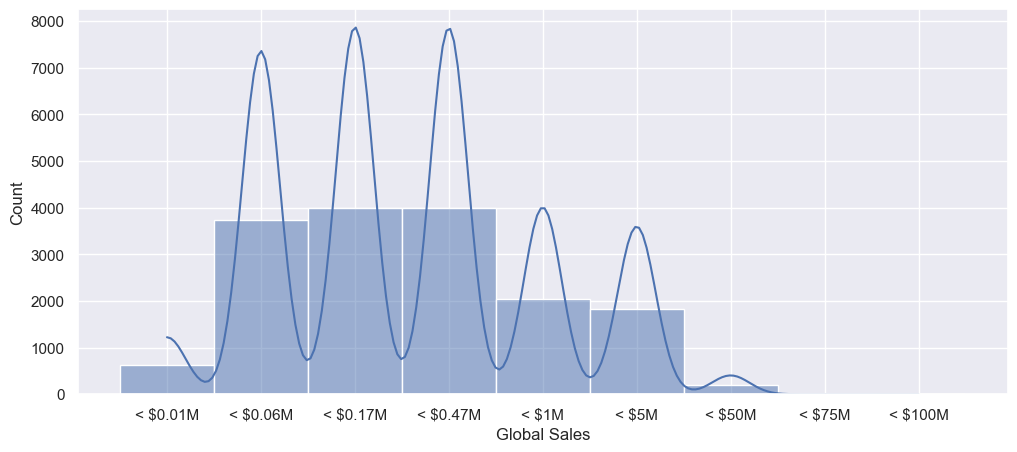

In [144]:
bin_sales = [0,.01,.06,.17,.47,1,5,50,75,100]
#bin_sales = [0,.5,1,5,10,20,50,75,100]
y = data['Global_Sales']
bin_labels = [f"< ${c}M" for c in bin_sales][1:] 
y = pd.cut(y, bins = bin_sales, labels = bin_labels)
y_var = pd.Series(y, name = "Global Sales")

sns.set(rc={"figure.figsize":(12, 5)})

sns.histplot(data = y_var, kde=True)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [113]:
  #check to make sure we have a 80/20 split
print("x_train size: " + str(len(x_train)) + "  x_test size: " + str(len(x_test)))
print("y_train size: " + str(len(y_train)) + "  y_test size: " + str(len(y_test)))

x_train size: 13132  x_test size: 3284
y_train size: 13132  y_test size: 3284


I now want to make sure this function gave me the correct split and left the same samples associated with the correct indices, and it looks like it did.

In [114]:
print(y_train)

7216     < $0.47M
780         < $5M
13665    < $0.06M
9485     < $0.17M
1321        < $5M
           ...   
4829     < $0.47M
10201    < $0.17M
9372     < $0.17M
7291     < $0.47M
7293     < $0.47M
Name: Global_Sales, Length: 13132, dtype: category
Categories (9, object): ['< $0.01M' < '< $0.06M' < '< $0.17M' < '< $0.47M' ... '< $5M' < '< $50M' < '< $75M' < '< $100M']


In [133]:
print(x_train)

         Name  Platform  Year_of_Release  Genre  Publisher  Critic_Score  \
7216   3916.0       4.0           2011.0    0.0      139.0     55.000000   
780     730.0      18.0           2015.0    8.0      139.0     73.000000   
13665  6473.0      15.0           1999.0   10.0      277.0     68.997119   
9485   4655.0      13.0           2010.0    0.0      466.0     84.000000   
1321   3304.0      15.0           1999.0    0.0      217.0     77.000000   
...       ...       ...              ...    ...        ...           ...   
4829   8142.0      29.0           2003.0   10.0      139.0     92.000000   
10201  2129.0      15.0           1999.0   11.0      349.0     51.000000   
9372   4592.0      16.0           2005.0    3.0      447.0     68.997119   
7291   3373.0      17.0           2009.0    0.0      139.0     43.000000   
7293   2974.0       6.0           2004.0    4.0      277.0     68.997119   

       User_Score  User_Count    Developer    Rating  
7216    95.000000  163.008846   

In [134]:
from sklearn.model_selection import GridSearchCV

parameter = {'max_leaf_nodes':range(2,100)}
pruned_tree = GridSearchCV(tree.DecisionTreeClassifier(),parameter)
pruned_tree.fit(x_train, y_train)
print("best parameters: ", pruned_tree.best_params_)

best parameters:  {'max_leaf_nodes': 98}


In [140]:
random_tree_clf = RandomForestClassifier(max_leaf_nodes = 120, n_estimators = 50)
random_tree_clf.fit(x_train, y_train.values.ravel())  #Use ravel to format the values and avoid warning found at https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

RandomForestClassifier(max_leaf_nodes=120, n_estimators=50)

In [141]:
y_r_prediction = random_tree_clf.predict(x_test)

In [142]:
print(random_tree_clf.score(x_test,y_test))

0.40712545676004874
